# Derivatives of Non-Linear Functions

## Introduction

In the last lesson, we saw that the derivative was the rate of change and that the derivative of a straight line is a constant. Let's explore non-linear functions and their derivatives in this lesson!

## Objectives

You will be able to:

* Calculate the derivative of a non-linear function

## Let's get started

Let's have another look at our the plot you saw previously:

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def jog(miles):
    return 6*miles

fig, ax = plt.subplots(figsize=(7.5,5.5))

x = np.linspace(0, 3.5, 100)

plt.plot(x, jog(x), label = "distance given # hours")

plt.hlines(y=6, xmin=0, xmax=1, linestyle = "dashed", color= 'lightgrey')
plt.vlines(x=1, ymin=0, ymax=6, linestyle = "dashed", color= 'lightgrey')

plt.hlines(y=12, xmin=0, xmax=2, linestyle = "dashed", color= 'lightgrey')
plt.vlines(x=2, ymin=0, ymax=12, linestyle = "dashed", color= 'lightgrey')

plt.vlines(x=2, ymin=6, ymax=12, color="darkorange", label = "y2 - y1 = 12 - 6 = 6")
plt.hlines(y=6, xmin=1, xmax=2, color="lightgreen", label = "x2 - x1 = 2 - 1 = 1")
ax.legend(loc='upper left', fontsize='large')

plt.ylabel("distance in miles")
plt.xlabel("number of hours")
plt.show()

Where our function was given by $f(x)=6x$. We saw multiple ways of calculating the derivative:
* Essentially, the derivative is the rate of change of a function
* Graphically this is rise over run
* Which can be calculated by taking two points, $(x_1, y_1)$ and $(x_2, y_2)$ and calculating $\frac{y_2 - y_1}{x_2 - x_1}$

Finally, we said that when we have a function $f(x)$, we can calculate the derivative with knowing the starting point $x$ and the change in our input, $\Delta x$: 

$$ \frac{f(x + \Delta x) - f(x)}{\Delta x} $$


## A non-linear function

So we saw previously that the derivative is the rate of change of our function.  We express this as $ f'(x) = \frac{\Delta f}{\Delta x}$. So far we have only calculated the derivatives with linear functions. As we'll see, things become trickier when working with more complicated functions.

For example, let's imagine that we are coaching our runner to perform in a track meet.  

![](./images/sprint.gif)

We may want to know how well our track start does at one part of the race, say the starting point, versus another point later in the race.  Then we will know what to focus on in practice.  We can imagine the distance traveled by our track star's distance through time as represented by the function $f(x) = x^2$: 

In [ ]:
def f(x):
    return np.square(x)

fig, ax = plt.subplots(figsize=(7.5,5.5))

x = np.linspace(0, 7, 100)
plt.plot(x, f(x))

plt.ylabel("distance in feet")
plt.xlabel("number of seconds")
plt.show()

> The graph shows that from seconds zero through seven, our track runner gets faster over time.  


## Calculating speed at second two
Now if we want to see how quickly our track star at the 2nd second as opposed to some other second, what would we do?  Well even if we knew nothing about derivatives, we would likely get a stopwatch and at second 2 would use it to calculate the speed.  Let's say that we start our stopwatch at second 2 and stop our stopwatch one second later.

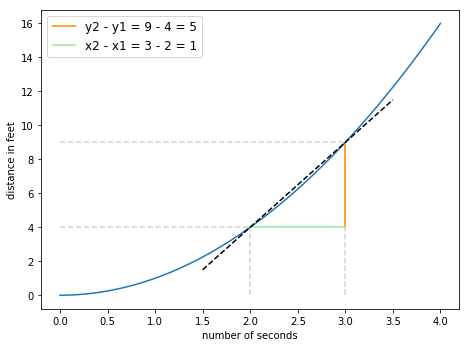

In [3]:
def f(x):
    return np.square(x)

fig, ax = plt.subplots(figsize=(7.5,5.5))

x = np.linspace(0, 4, 100)

plt.plot(x, f(x))

plt.hlines(y=9, xmin=0, xmax=3, linestyle = "dashed", color= 'lightgrey')
plt.vlines(x=2, ymin=0, ymax=4, linestyle = "dashed", color= 'lightgrey')
plt.hlines(y=4, xmin=0, xmax=2, linestyle = "dashed", color= 'lightgrey')
plt.vlines(x=3, ymin=0, ymax=9, linestyle = "dashed", color= 'lightgrey')

plt.vlines(x=3, ymin=4, ymax=9, color="darkorange", label = "y2 - y1 = 9 - 4 = 5")
plt.hlines(y=4, xmin=2, xmax=3, color="lightgreen", label = "x2 - x1 = 3 - 2 = 1")

# tangent line
x_dev = np.linspace(1.5, 3.5, 100)
a = 2
delta_a = 1
fprime = (f(a+delta_a)-f(a))/delta_a 
tan = f(a)+fprime*(x_dev-a)

# plot of the function and the tangent
plt.plot(x_dev, tan, color = "black", linestyle="dashed")

ax.legend(loc='upper left', fontsize='large')

plt.ylabel("distance in feet")
plt.xlabel("number of seconds")
plt.show()

As the graph above shows, we measure the change at second two by starting our stopwatch at second 2 and stopping it one second later.  So turning this into our formula for calculating a derivative of:  

$$ f'(x) = \frac{f(x + \Delta x) - f(x)}{\Delta x}  $$

we do the following: 
* Set $x = 2$, as that's the point we want to calculate the rate of change at 
* Set $\Delta x = 1$, as that's the number of seconds that elapsed on our stopwatch

and plugging in these values, we have: 

$$ f'(2) =  \frac{f(2 + 1) - f(2)}{ 1} =  \frac{f(3) - f(2)}{1} $$ 

So our rate of change at second number 2, with a $\Delta x = 1$ is calculated by subtracting the function's output at second 2 from the function's output at second 3 and dividing by $\Delta x=1$. 

Simplifying our calculation of $f'(x)$ further by calculating the outputs at $x = 2$ and $x = 3 $ we have:

* $f(3) = (3)^2 = 9$ is the output at $x = 3$ and 
* $f(2) = (2)^2 = 4$ is the output at $x = 2$ so 

$$f'(2) =  \frac{9 - 4}{1} = \frac{5}{1} = 5 $$

## The problem with our derivative formula

Let's take another close look at the straight line in the graph above.  That straight line is a supposed to be the rate of change of the function at the point $x = 2$.  And it comes close.  But it doesn't exactly line up.  Our black dashed line quickly begins to move above the blue line, indicating that it has a faster rate of change than the blue line at $x = 2$.  This means that our calculation that $f'(2) = 5 $ is actually too high.

Here is **the problem:**

* in our formula of $ f'(x) = \dfrac{f(x + \Delta x) - f(x)}{\Delta x} $, we are seeing the rate of change not just where $x = 2$, but from the period from $x = 2$ to $x = 3$. 
Recall that the derivative is supposed to be the **instantaneous** rate of change! However, it seems that this interval does not reflect the **instantaneous** nature!

In other words, **the runner would tell us** that we are not capturing their speed at precisely second two: 

> This is because in between the clicks of our stopwatch from seconds two to three, our runner is getting faster and while we are supposed to be calculating his speed just at second two, our calculation includes his increase in speed from seconds two to three.

> Therefore, the black dashed has a larger rate of change than the blue line because we have included this increase in speed at second three.

**A mathematician would make the same point** that we are not actually calculating the derivative: 

> Our derivative means we are calculating how fast a function is changing at any given moment, and precisely at that moment.  And unlike in where our functions were linear, here the rate of change of our function is always changing.  The larger our value of $\Delta x$, the less our derivative reflects the rate of change at just that point. 

## The solution: Decrease the change in $x$ ($\Delta x$)

If you were holding a stopwatch and someone asked you to calculate their speed at second number 2, how could you be more accurate?  Well, you would want to decrease the change in seconds.  Of course, our runner could continue to protest and say that we are still influenced by the speed at other times.

However, the mathematician has a solution to this. To calculate the rate of change at precisely one point, the solution is to use our imagination.  We calculate the derivative with a $\Delta $ of 1, then calculate it again with a $\Delta x$ of .1, then again with $\Delta x$ of .01, then again with $\Delta $ .001.  Our derivative calculation should show convergence on a single number as our $\Delta $ approaches zero and that number is our derivative.

> ** The derivative of a function is a change in the function's output across $\Delta x$, as $\Delta x $ approaches zero. **    

In this example, by decreasing $\Delta x$ we can see a fairly clear pattern.

| $ \Delta x $        | $ \frac{\Delta y}{\Delta x} $|
| ------------- |:-------------:|
| 1      | 5   |
| .1      | 4.1|
| .01 | 4.01     |
| .001 | 4.001      |


## Seeing this visually: tangent lines

Another way to see how we approach the derivative is by seeing how a line becomes more tangent to the curve as $\Delta x$ decreases.  

> Tangent to the curve means that our line is just touching the curve.

**The more that a line is tangent to the curve at a point, the more it's slope matches the derivative.**

Ok, let's get a sense of what we mean by tangent to the curve.  The black dashed line below is a line whose slope is calculated by using our derivative function, with $ \Delta x = 1$.  As you can see it is **not tangent to our function, $f(x)$ ** as it does not *just touch* the blue line, but rather touches it in two places.

In [1]:
def make_plot(delta_a):

    lab= "delta x = " + str(delta_a)
    plt.plot(x, f(x), label = lab)

    plt.hlines(y=9, xmin=1, xmax=3, linestyle = "dashed", color= 'lightgrey')
    plt.vlines(x=2, ymin=1, ymax=4, linestyle = "dashed", color= 'lightgrey')
    plt.hlines(y=4, xmin=1, xmax=2, linestyle = "dashed", color= 'lightgrey')
    plt.vlines(x=3, ymin=1, ymax=9, linestyle = "dashed", color= 'lightgrey')

    # tangent line
    x_dev = np.linspace(1.5, 3.2, 100)
    a = 2
    fprime = (f(a+delta_a)-f(a))/delta_a 
    tan = f(a)+fprime*(x_dev-a)

    # plot of the function and the tangent
    plt.plot(x_dev, tan, color = "black", linestyle="dashed")
    plt.legend(loc="upper left", bbox_to_anchor=[0, 1],
           ncol=2, fancybox=True);
    return

In [2]:
x = np.linspace(1, 3.5, 100)
fig, ax = plt.subplots(figsize=(6,4))
make_plot(1)

NameError: name 'np' is not defined

If our black dashed line had the same slope, or rate of change, as our function at that $x = 2$, it would just touch the blue line.  We know from above that we get closer to the rate of change of the function as we decrease $ \Delta x$ in our derivative formula. 

Let's look again using a smaller $\Delta x$.

Below are the plots of our lines using our derivative formula for when  $\Delta x = 1$, $\Delta x =0.1, \Delta x = 0.01$ and $\Delta x = 0.001$.

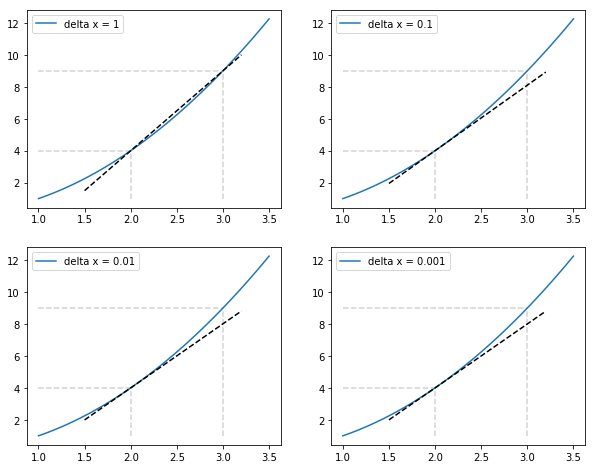

In [6]:
x = np.linspace(1, 3.5, 100)
fig, ax = plt.subplots(figsize=(10,8))

# create 4 subplots
plt.subplot(221)
make_plot(delta_a = 1)
plt.subplot(222)
make_plot(delta_a = 0.1)
plt.subplot(223)
make_plot(delta_a = 0.01)
plt.subplot(224)
make_plot(delta_a = 0.001)

Going to the top left figure to the bottom right figure, you can see that for a smaller $\Delta x$, we get a more tangent line. This is particularly visible going from $\Delta x = 1$  to $\Delta x = .1$. This is no surprise, as the difference between a slope moving from 5 to 4.1 is still visible with the naked eye, but moving from 4.1 to 4.01 to 4.001 is fairly impossible to see. 

As you can see, as $\Delta x $ approaches zero, $f'(2) $ approaches $ 4 $.  

## Approaching our formula for a derivative

So to describe the above, at the point $x = 2 $, the **limit** of $\dfrac{\Delta y}{\Delta x} $ -- that is the number that $\dfrac{\Delta y}{\Delta x} $ converges to as  $ \Delta x $ approaches zero -- is 4.  We can abbreviate this into the following expression: 

When $x = 2, \displaystyle\lim_{\Delta x\to 0} \frac{\Delta y}{\Delta x} = 4  $.

Or, better yet, we can update and correct our definition of derivative to be:

$$ f'(x) = \displaystyle {\lim_{ \Delta x \to 0}} \frac{f(x + \Delta x) - f(x)}{\Delta x} $$ 

So the derivative is the change in output as we *just nudge* our input.  That is how we calculate *instantaneous rate of change*.  We can determine the runner's speed at precisely second number 2, by calculating the runner's speed over shorter and shorter periods of time, to see what that number approaches.

One final definition before we go.  Instead of $\Delta x$, mathematicians sometimes use the variable $h$ to describe the change in inputs.  So replacing our $\Delta x$ symbols with $h$'s we have:

$$ f'(x) = \lim_{ h\to0} \frac{f(x + h) - f(x)}{h} $$ 

Above is the formula for the derivative for all types of functions linear and nonlinear.

## Summary

In this section, we learned about derivatives.  A derivative is the instantaneous rate of change of a function.  To calculate the instantaneous rate of change of a function, we see the value that $\dfrac{\Delta y}{\Delta x} $ approaches as $\Delta x $ approaches zero.  This way, we are not calculating the rate of change of a function across a given distance.  Instead, we are finding the rate of change at a specific moment. 